In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import operator
from collections import defaultdict
import pandas as pd
import matplotlib.colors as mcolors
import gene_level.network as nt
# import importlib
# nt = importlib.import_module('gene_level.network')
import itertools as it
import matplotlib

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial']
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import os
os.chdir('/mnt/data/hong/2022/human_placenta/')

In [3]:
## mk edge list
tb = pd.read_csv('output/communication/all_de_intravillous_lr_major.tsv', sep='\t')

In [17]:
tb = tb.query('ligand_props>0.1&receptor_props>0.1')

In [18]:
tb_between = tb.query("source!=target")

In [19]:
lr_ = pd.DataFrame(columns=['#node1', 'node2', 'combined_score'])
## join two columns of tb

lr_['#node1'] = tb_between['ligand_complex'] + '-' + tb_between['source']
lr_['node2'] = tb_between['receptor_complex'] + '-' + tb_between['target']
lr_['combined_score'] = tb_between['interaction_score']

In [7]:
## notice that this is a directional network
## write out lr_
lr_.to_csv('output/communication/lr_between_major_exp.tsv', sep='\t', index=False)

In [4]:
lr_net = nx.read_edgelist('output/communication/lr_between_major_exp.tsv',data=(('combined_score',float),), delimiter='\t', create_using=nx.DiGraph)

In [8]:
lr_['combined_score'].max()

0.99495

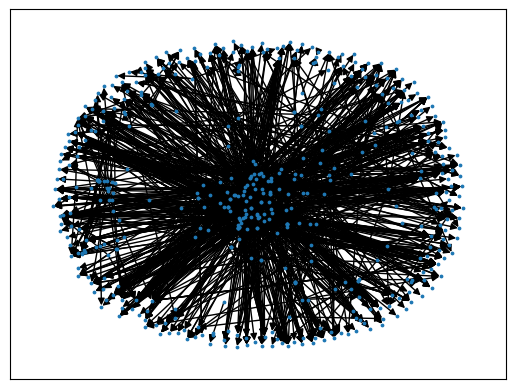

In [9]:
# G = nx.dodecahedral_graph()
nx.draw_networkx(lr_net, with_labels=False, arrows=True, node_size=3)

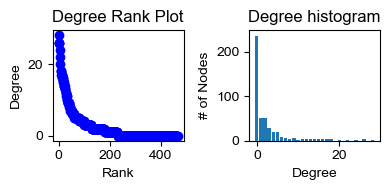

In [7]:
degree_sequence = sorted((d for n, d in lr_net.out_degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(4, 2))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(2, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(lr_net), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=3)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

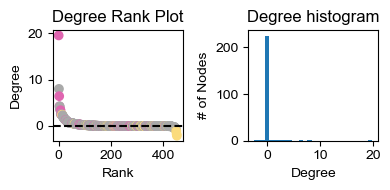

In [21]:
degree_sequence = sorted((d for n, d in lr_net.out_degree(weight='combined_score')), reverse=True)
ordered_dict = dict(sorted(lr_net.out_degree(weight='combined_score'), key=lambda item: item[1], reverse=True))
# print(len(degree_sequence))
# print(ordered_dict.keys())
node_keys = np.array(list(ordered_dict.keys()))

color_sequence = np.where(np.core.defchararray.find(node_keys,'Hofbauer cells')!=-1, '#FBDB7D', np.where(np.core.defchararray.find(node_keys,'Endo-1')!=-1, '#df65b0ff', 'darkgrey'))
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(4, 2))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(2, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(lr_net), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=3)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[:, :2])
ax1.scatter(range(len(degree_sequence)), degree_sequence, c=color_sequence)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax1.axhline(y=0, linestyle='--', c='black')
ax2 = fig.add_subplot(axgrid[:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig('figures/communicate/out_degree_both_exp.pdf')

In [6]:
from matplotlib import cm
trohoblast_cmap = cm.get_cmap('GnBu', 7)
stroma_cmap = cm.get_cmap('PuRd', 7)
immune_cmap = cm.get_cmap('YlOrBr', 8)
stb_map = cm.get_cmap('tab20')
type_color_dict = {'VEC' : stroma_cmap(3), 'Endo-2': stroma_cmap(4), 
                   'Fibroblast': stroma_cmap(5), 'Myofibroblast': stroma_cmap(6),
                  'EVT': trohoblast_cmap(2), 'STB_a': stb_map(0),
                  'STB_b': stb_map(1), 'STB_c': stb_map(2),
                  'eSTB': trohoblast_cmap(4), 'CTB': trohoblast_cmap(5),
                  'pCTB': trohoblast_cmap(6), 'Hofbauer cells': immune_cmap(2),
                  'Monocyte': immune_cmap(3), 'B cells': immune_cmap(4),
                  'NK cells': immune_cmap(5), 'T cells': immune_cmap(6)}
hex_dict = {k: matplotlib.colors.to_hex(v, keep_alpha=True) for k,v in type_color_dict.items()}

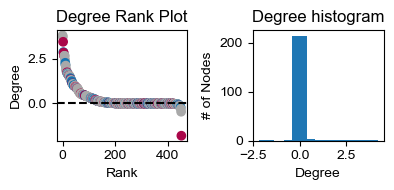

In [9]:
degree_sequence = sorted((d for n, d in lr_net.in_degree(weight='combined_score')), reverse=True)
ordered_dict = dict(sorted(lr_net.in_degree(weight='combined_score'), key=lambda item: item[1], reverse=True))
# print(len(degree_sequence))
# print(ordered_dict.keys())
node_keys = np.array(list(ordered_dict.keys()))

color_sequence = np.where(np.core.defchararray.find(node_keys,'CTB')!=-1, hex_dict['CTB'], np.where(np.core.defchararray.find(node_keys,'Fibroblast')!=-1, hex_dict['Fibroblast'], 'darkgrey'))
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(4, 2))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(2, 4)

ax1 = fig.add_subplot(axgrid[:, :2])
ax1.scatter(range(len(degree_sequence)), degree_sequence, c=color_sequence)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax1.axhline(y=0, linestyle='--', c='black')
ax2 = fig.add_subplot(axgrid[:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig('figures/communicate/in_degree_both_exp_newcolor.pdf')

In [8]:
out_degrees = {node:val for (node, val) in lr_net.out_degree(weight='combined_score')}



In [23]:
in_degrees = {node:val for (node, val) in lr_net.in_degree(weight='combined_score')}
in_degrees_df = pd.DataFrame.from_dict(in_degrees, orient='index', columns=['degree'])
in_degrees_df.to_csv('output/communication/indegree_major.tsv', sep='\t')

In [9]:
out_degrees_df = pd.DataFrame.from_dict(out_degrees, orient='index', columns=['degree'])

In [10]:
out_degrees_df.sort_values('degree', ascending=False).head(10)

,degree
FN1-Endo-1,19.48645
FN1-STB-a,7.98630
COL4A2-Endo-1,6.41775
COL4A1-Endo-1,4.24935
CALM1-STB-c,4.21860
BMP6-Endo-1,3.91175
FN1-CTB,3.72750
LAMA3-STB-b,3.44210
IGF1-Endo-1,3.39870
TGFB1-STB-c,2.72690


In [14]:
out_degrees_df.to_csv('output/communication/outdegree_major.tsv', sep='\t')